### HW 6 - Regression
#### Shifa Shah
#### ss08336@st.habib.edu.pk

In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv('HousePricingData.csv')

In [4]:
df

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,1457,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,1458,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,1459,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [5]:
df = df.drop(['Id'],axis=1) # dropping unique id

In [6]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


### Q1

In [8]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']

In [9]:
X

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition
0,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal
1,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal
2,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal
3,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml
4,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal
1456,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal
1457,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal
1458,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal


In [10]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
X = sm.add_constant(X['GrLivArea'])

In [12]:
X

,const,GrLivArea
0,1.0,1710
1,1.0,1262
2,1.0,1786
3,1.0,1717
4,1.0,2198
...,...,...
1455,1.0,1647
1456,1.0,2073
1457,1.0,2340
1458,1.0,1078


In [13]:
model = sm.OLS(Y,X).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        16:18:41   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.pvalues

const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64

### Interpretation of the above result

R-squared: 0.502 ( value above 0.3 which usually shows good relationship between variables) <br>
Y (prediction) = SalePrice <br> X (input) = GrLivArea <br> For every unit increase in GrLivArea,
the SalePrice increases by 107.1304.

Text(0, 0.5, 'SalePrice')

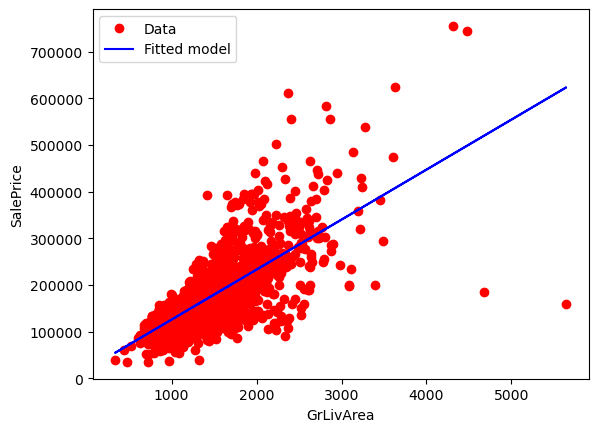

In [18]:
plt.plot(df['GrLivArea'].values, df['SalePrice'].values,'ro')
plt.plot(df['GrLivArea'].values ,model.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Q2

In [20]:
X = df.drop(['LotArea'],axis=1)
Y = df['LotArea']

In [21]:
X

,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [22]:
Y

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [23]:
X = sm.add_constant(X['TotalBsmtSF'])
X

,const,TotalBsmtSF
0,1.0,856
1,1.0,1262
2,1.0,920
3,1.0,756
4,1.0,1145
...,...,...
1455,1.0,953
1456,1.0,1542
1457,1.0,1152
1458,1.0,1078


In [24]:
model = sm.OLS(Y,X).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        16:18:41   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    658.492      6.441      0.000    2949.946    5533.331
TotalBsmtSF     5.9344      0.575     10.317      0.000       4.806       7.063
==============================================================================
Omnibus:                     2613.787   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2702216.991
Skew:                          12.411   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of the above result

R-squared: 0.068 (R squared value is less than 0.3 which does not show a good relationship between variables) <br>
Y (prediction) = LotArea <br> X (input) = TotalBsmtSF  <br> For every unit increase in TotalBsmtSF,
the LotArea increases by 5.9344.

Text(0, 0.5, 'LotArea')

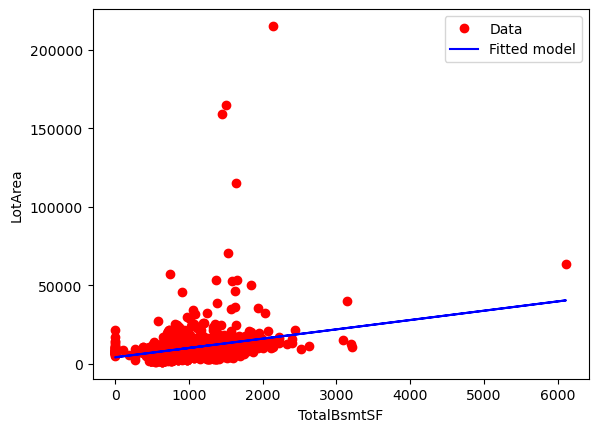

In [28]:
plt.plot(df['TotalBsmtSF'].values, df['LotArea'].values,'ro')
plt.plot(df['TotalBsmtSF'].values ,model.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')

### Q3

#### Calculating correlation

In [31]:
corr_1 = df['GrLivArea'].corr(df['SalePrice'])
corr_1

0.7086244776126522

Positive correlation between GrLivArea and SalePrice which shows that as GrLivArea increases, the SalePrice also increases. The corr value is also close to 1 which shows a good relationship between both the variables as predicted by the R-squared value. 

In [33]:
corr_2 = df['TotalBsmtSF'].corr(df['LotArea'])
corr_2

0.2608331345451576

Slight Positive correlation between TotalBsmtSF and LotArea which shows that as TotalBsmtSF increases, the LotArea also increases slightly. The corr value is far from 1 and more closer to 0 which does not show a good relationship between both the variables as predicted by the R-squared value. 

### Q4

In [36]:
one_hot = pd.get_dummies(df, columns = ['PavedDrive', 'SaleCondition'], dtype=int) # dealing with categorical inputs

In [37]:
X1 = one_hot.drop(['SalePrice'],axis=1)
Y1 = one_hot['SalePrice']

In [38]:
X1 = sm.add_constant(X1)

In [39]:
X1

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8450,7,5,2003,856,856,854,1710,1,...,2,0,0,1,0,0,0,0,1,0
1,1.0,9600,6,8,1976,1262,1262,0,1262,0,...,2,0,0,1,0,0,0,0,1,0
2,1.0,11250,7,5,2001,920,920,866,1786,1,...,2,0,0,1,0,0,0,0,1,0
3,1.0,9550,7,5,1915,756,961,756,1717,1,...,3,0,0,1,1,0,0,0,0,0
4,1.0,14260,8,5,2000,1145,1145,1053,2198,1,...,3,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,7917,6,5,1999,953,953,694,1647,0,...,2,0,0,1,0,0,0,0,1,0
1456,1.0,13175,6,6,1978,1542,2073,0,2073,1,...,2,0,0,1,0,0,0,0,1,0
1457,1.0,9042,7,9,1941,1152,1188,1152,2340,0,...,1,0,0,1,0,0,0,0,1,0
1458,1.0,9717,5,6,1950,1078,1078,0,1078,1,...,1,0,0,1,0,0,0,0,1,0


In [40]:
model_q4 = sm.OLS(Y1,X1).fit()

In [41]:
model_q4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:18:42   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [42]:
model_q4.pvalues

const                    1.748584e-11
LotArea                  1.360238e-05
OverallQual              7.800179e-44
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
TotalBsmtSF              1.808700e-03
1stFlrSF                 7.673325e-02
2ndFlrSF                 1.988429e-01
GrLivArea                1.199107e-01
BsmtFullBath             1.550604e-11
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
BedroomAbvGr             3.463315e-04
KitchenAbvGr             1.227827e-05
Fireplaces               4.756968e-03
GarageCars               6.026648e-13
PavedDrive_N             3.388581e-11
PavedDrive_P             8.871643e-12
PavedDrive_Y             7.718488e-11
SaleCondition_Abnorml    1.307567e-12
SaleCondition_AdjLand    2.748268e-04
SaleCondition_Alloca     1.920894e-08
SaleCondition_Family     7.062461e-12
SaleCondition_Normal     3.154105e-11
SaleCondition_Partial    8.257454e-06
dtype: float

### Interpretation of the above result

R-squared: 0.803 (any value above 0.3 usually shows good relationship between all input variables and output/response variable) <br><br>

Most Significant Variables: <br>
1) OverallQual: smallest p value 7.800179e-44 which suggests that Saleprice is highly dependent on this variable. <br>
2) GarageCars: second smallest p value 6.026648e-13, indicating that this variable is also strongly correlated with SalePrice. <br>
3) SaleCondition_Abnorml: p value 1.307567e-12 suggests that SalePrice is significantly influenced by this variable, making it one of the key predictors. <br>

Least Significant Variables:<br>
1) HalfBath: highest p value 9.590573e-01 which suggests that Saleprice is not dependent on this variable. <br>
2) BsmtHalfBath: second highest p value 2.090272e-01, which indicates that SalePrice is not significantly influenced by the variable.
3) 2ndFlrSF: high p value 1.988429e-01 which suggests that Saleprice is not very dependent on this variable. <br>

In [45]:
filename = 'regmodel_q4.pkl'
pickle.dump(model_q4, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open('regmodel_q4.pkl', 'rb'))

#### Creating new input.

In [48]:
df_new = pd.DataFrame({
    'const': [1.0],
    'LotArea': [8500],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2005],
    'TotalBsmtSF': [1000],
    '1stFlrSF': [1200],
    '2ndFlrSF': [800],
    'GrLivArea': [2000],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [0],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [1],
    'SaleCondition_Partial': [0]
})

In [49]:
df_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8500,7,5,2005,1000,1200,800,2000,1,...,2,0,0,1,0,0,0,0,1,0


In [50]:
loaded_model.predict(df_new)

0    242673.119122
dtype: float64

### Interpretation

##### For the new property, the predicted Saleprice is 242673.12 using the regression model.

### Q5

In [54]:
X2 = one_hot.drop(['LotArea'],axis=1)
Y2 = one_hot['LotArea']

In [55]:
X2 = sm.add_constant(X2)
X2

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,1,0,0,0,0,1,0
1,1.0,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,1,0,0,0,0,1,0
2,1.0,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,1,0,0,0,0,1,0
3,1.0,7,5,1915,756,961,756,1717,1,0,...,140000,0,0,1,1,0,0,0,0,0
4,1.0,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,6,5,1999,953,953,694,1647,0,0,...,175000,0,0,1,0,0,0,0,1,0
1456,1.0,6,6,1978,1542,2073,0,2073,1,0,...,210000,0,0,1,0,0,0,0,1,0
1457,1.0,7,9,1941,1152,1188,1152,2340,0,0,...,266500,0,0,1,0,0,0,0,1,0
1458,1.0,5,6,1950,1078,1078,0,1078,1,0,...,142125,0,0,1,0,0,0,0,1,0


In [56]:
model_q5 = sm.OLS(Y2,X2).fit()

In [57]:
model_q5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        16:18:42   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [58]:
model_q5.pvalues

const                    2.328767e-02
OverallQual              4.455178e-09
OverallCond              7.446413e-01
YearBuilt                4.732388e-02
TotalBsmtSF              6.363624e-02
1stFlrSF                 3.034238e-01
2ndFlrSF                 5.378269e-01
GrLivArea                7.348783e-01
BsmtFullBath             1.297222e-03
BsmtHalfBath             5.094898e-02
FullBath                 5.288646e-01
HalfBath                 4.473389e-01
BedroomAbvGr             1.620633e-01
KitchenAbvGr             6.650849e-02
Fireplaces               1.125990e-06
GarageCars               2.181220e-01
SalePrice                1.360238e-05
PavedDrive_N             1.843569e-02
PavedDrive_P             2.037643e-02
PavedDrive_Y             3.908688e-02
SaleCondition_Abnorml    3.018630e-02
SaleCondition_AdjLand    1.718869e-01
SaleCondition_Alloca     6.414958e-02
SaleCondition_Family     6.643903e-02
SaleCondition_Normal     1.889359e-02
SaleCondition_Partial    4.703934e-02
dtype: float

#### Interpretation of the above result

R-squared: 0.172 (value less than 0.3 shows not a very good relationship between all input variables and output/response variable) <br><br>

Most Significant Variables: <br>
1. OverallQual: The smallest p-value is 4.455178e-09, which suggests that LotArea is highly dependent on this variable. <br>
2. Fireplaces: The second smallest p-value is 1.125990e-06, indicating that the number of fireplaces is also strongly correlated with LotArea. <br>
3. SalePrice: A p-value of 1.360238e-05 suggests that LotArea is significantly influenced by this variable, making it one of the key predictors. <br>

Least Significant Variables:<br>
1. OverallCond: The highest p-value is 7.446413e-01, which suggests that LotArea is not dependent on the overall condition of the house.
2. GrLivArea: The second highest p-value is 7.348783e-01, which indicates that LotArea is not significantly influenced by the variable.
3. 2ndFlrSF: A high p-value of 5.378269e-01 suggests that LotArea is not very dependent on this variable.

In [61]:
filename = 'regmodel_q5.pkl'
pickle.dump(model_q5, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open('regmodel_q5.pkl', 'rb'))

#### Creating new input

In [64]:
df_new = pd.DataFrame({
    'const': [1.0],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2005],
    'TotalBsmtSF': [1000],
    '1stFlrSF': [1200],
    '2ndFlrSF': [800],
    'GrLivArea': [2000],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'SalePrice': [212500],  
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [0],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [1],
    'SaleCondition_Partial': [0]
})

In [65]:
loaded_model.predict(df_new)

0    11443.773896
dtype: float64

#### Interpretation 

##### For the new property, the predicted LotArea is 11443.77 using the regression model.

#### Q6

In [69]:
p_values = model_q4.pvalues
significant_cols = p_values[p_values <= 0.05].index

In [70]:
X1_new = X1[significant_cols]
X1_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8450,7,5,2003,856,1,3,1,0,2,0,0,1,0,0,0,0,1,0
1,1.0,9600,6,8,1976,1262,0,3,1,1,2,0,0,1,0,0,0,0,1,0
2,1.0,11250,7,5,2001,920,1,3,1,1,2,0,0,1,0,0,0,0,1,0
3,1.0,9550,7,5,1915,756,1,3,1,1,3,0,0,1,1,0,0,0,0,0
4,1.0,14260,8,5,2000,1145,1,4,1,1,3,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,7917,6,5,1999,953,0,3,1,1,2,0,0,1,0,0,0,0,1,0
1456,1.0,13175,6,6,1978,1542,1,3,1,2,2,0,0,1,0,0,0,0,1,0
1457,1.0,9042,7,9,1941,1152,0,4,1,2,1,0,0,1,0,0,0,0,1,0
1458,1.0,9717,5,6,1950,1078,1,2,1,0,1,0,0,1,0,0,0,0,1,0


In [71]:
model_q4_new = sm.OLS(Y1, X1_new).fit()

In [72]:
model_q4_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:18:43   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.244e+05   7.03e+04     -4.617      0.000   -4.62e+05   -1.87e+05
LotArea                   0.6879      0.113      6.112      0.000       0.467       0.909
OverallQual             2.63e+04   1172.051     22.435      0.000     2.4e+04    2.86e+04
OverallCond            5003.4352   1056.883      4.734      0.000    2930.242    7076.628
YearBuilt               188.4952     53.575      3.518      0.000      83.402     293.588
TotalBsmtSF              29.0364      3.123      9.297      0.000      22.910      35.163
BsmtFullBath           1.207e+04   2200.508      5.486      0.000    7754.908    1.64e+04
BedroomAbvGr           9735.2845   1368.080      7.116      0.000    7051.645    1.24e+04
KitchenAbvGr          -4621.8269   5200.420     -0.889      0.374   -1.48e+04    5579.372
Fireplaces             1.453e+04   1873.409      7.757      0.000    1.09e+04    1.82e+04
GarageCars             1.898e+04   1892.292     10.030      0.000    1.53e+04    2.27e+04
PavedDrive_N          -1.014e+05   2.31e+04     -4.392      0.000   -1.47e+05   -5.61e+04
PavedDrive_P          -1.148e+05   2.37e+04     -4.841      0.000   -1.61e+05   -6.83e+04
PavedDrive_Y          -1.081e+05   2.45e+04     -4.413      0.000   -1.56e+05   -6.01e+04
SaleCondition_Abnorml -6.118e+04   1.23e+04     -4.955      0.000   -8.54e+04    -3.7e+04
SaleCondition_AdjLand -4.677e+04    2.1e+04     -2.226      0.026    -8.8e+04   -5555.581
SaleCondition_Alloca  -5.117e+04    1.6e+04     -3.204      0.001   -8.25e+04   -1.98e+04
SaleCondition_Family  -7.729e+04   1.41e+04     -5.490      0.000   -1.05e+05   -4.97e+04
SaleCondition_Normal  -5.708e+04   1.23e+04     -4.640      0.000   -8.12e+04   -3.29e+04
SaleCondition_Partial -3.089e+04   1.33e+04     -2.321      0.020    -5.7e+04   -4781.637
==============================================================================
Omnibus:                      634.582   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28283.258
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      24.408   Cond. No.                     1.90e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
model_q4_new.pvalues

const                    4.238501e-06
LotArea                  1.265710e-09
OverallQual              7.307934e-96
OverallCond              2.416110e-06
YearBuilt                4.477226e-04
TotalBsmtSF              5.172977e-20
BsmtFullBath             4.855862e-08
BedroomAbvGr             1.744834e-12
KitchenAbvGr             3.742905e-01
Fireplaces               1.639144e-14
GarageCars               6.219807e-23
PavedDrive_N             1.206090e-05
PavedDrive_P             1.431781e-06
PavedDrive_Y             1.095392e-05
SaleCondition_Abnorml    8.074590e-07
SaleCondition_AdjLand    2.616560e-02
SaleCondition_Alloca     1.384682e-03
SaleCondition_Family     4.735085e-08
SaleCondition_Normal     3.804394e-06
SaleCondition_Partial    2.042982e-02
dtype: float64

### Analysis

The old model is better based on the R-squared values. The old model has a greater R-squared value of 0.803, meaning it explains 80.3% of the variance in SalePrice. In contrast, the new model has a lower R-squared value of 0.753, explaining only 75.3% of the variance. Since a higher R-squared value indicates a model that better fits the data, the old model is the stronger choice.

### Q7

In [77]:
df_new = pd.DataFrame({
    'const': [1.0, 1.0, 1.0],  
    'LotArea': [8500, 9000, 7800],
    'OverallQual': [7, 8, 6],
    'OverallCond': [5, 4, 6],
    'YearBuilt': [2005, 1990, 2010],
    'TotalBsmtSF': [1000, 1200, 900],
    'BsmtFullBath': [1, 2, 1],
    'BedroomAbvGr': [3, 4, 2],
    'KitchenAbvGr': [1, 1, 1],  
    'Fireplaces': [1, 2, 0],
    'GarageCars': [2, 3, 1],
    'PavedDrive_N': [0, 0, 1],
    'PavedDrive_P': [0, 1, 0],
    'PavedDrive_Y': [1, 0, 1],
    'SaleCondition_Abnorml': [0, 1, 0],
    'SaleCondition_AdjLand': [0, 0, 1],
    'SaleCondition_Alloca': [0, 1, 0],
    'SaleCondition_Family': [1, 0, 0],
    'SaleCondition_Normal': [0, 1, 1],
    'SaleCondition_Partial': [0, 0, 1],
})

In [78]:
df_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8500,7,5,2005,1000,1,3,1,1,2,0,0,1,0,0,0,1,0,0
1,1.0,9000,8,4,1990,1200,2,4,1,2,3,0,1,0,1,0,1,0,1,0
2,1.0,7800,6,6,2010,900,1,2,1,0,1,1,0,1,0,1,0,0,1,1


In [79]:
model_q4_new.predict(df_new)

0    201280.733170
1    182352.944547
2    -24566.102167
dtype: float64

### Analysis

The predicted values do not make sense especially the negative value (-24566.10) as SalePrice can not be a negative value. Hence, these values suggest that the new model has problems and is not working correctly.